# =====================================
# 6A - L1 Introduction to Motion
# =====================================

## Visual Motion
<br />
<figure>
    <img src="imgs/L61.gif" />
    <center><figcaption>Fig.1(a): example of gif</figcaption></center>
</figure>

## Video 

A video is a sequene of frames captured over time - usually quickly

- Now our image data is a function of smape (x,y) and time (t)

<br />
<figure>
    <img src="imgs/L62.png" />
    <center><figcaption>Fig.1(b)</figcaption></center>
</figure>

## Motion Applications: Bideo segmentation

**Background subtraction**

- A static camera is observing a scene
- Goal: seperate the static background from the moving foreground

<br />
<figure>
    <img src="imgs/L63.png" />
    <center><figcaption>Fig.2(a)</figcaption></center>
</figure>

**Shot boundary detection**


<br />
<figure>
    <img src="imgs/L64.png" />
    <center><figcaption>Fig.2(b)</figcaption></center>
</figure>

**Motion segmentation**
- Segment the video into multiple coherently moving objects

<br />
<figure>
    <img src="imgs/L65.png" />
    <center><figcaption>Fig.2(c)</figcaption></center>
</figure>

## Motion and perceptual organization

- Gestalt psychology (Wertheimer, 1880-1943)
<br />
<figure>
    <img src="imgs/L66.png" />
    <center><figcaption>Fig.3(a)</figcaption></center>
</figure>

- Sometimes, motion is the only cue

<br />
<figure>
    <img src="imgs/L67.png" width="200px" />
    <img src="imgs/L68.png" width="200px"/>
    <img src="imgs/L69.gif" width="200px"/>
    <center><figcaption>Fig.3(b)</figcaption></center>
</figure>

## Impverished Motion

- Even "impoverished" motion data can evoke a strong percept

<br />
<figure>
    <img src="imgs/L610.png" width="200px"/>
    <img src="imgs/L611.gif" width="200px"/>
    <center><figcaption>Fig.4: notice the center point is not moving. Focus on it and you see how weird it is. Try to take it out of your head after that !!!</figcaption></center>
</figure>

## Quiz

Examples of Impoverished Motion

Video: <a href="https://www.youtube.com/watch?v=1F5ICP9SYLU">2-Dimensional Motion Perception</a>



## More Applications of Motion Analysis

### Mosaicing

<br />
<figure>
    <img src="imgs/L612.png" width="400px" />
    <img src="imgs/L613.png" width="400px"/>
    <center><figcaption>Fig.5</figcaption></center>
</figure>

- **Segmentation of objects in space or time**
- **Estimating 3D structure**
- **Learning dynamical models - how things move**
- **Recognizing events and activities**
- **Improving video quality (motion stabilization)**


## Motion Estimation Techniques

**Featured-based methods**

- Extract visual features (corners, textured areas) and track them over multiple frames
- Sparse motion fields, but more robust tracking
- Suitable when image motion is large (10s of pixels)

**Direct, dense methods**

- Directly recover image motion at each pixel from spatio-temporal image brightness variations
- Dense motion fields, but sensitive to appearance variations
- Suitable for video and whn image motion is small



# =====================================
# 6B - L1 Dense flow: Brightness constraints
# =====================================

## Motion estimation: Optical flow

Optic flow is the **apparent** motion of objects or surfaces
<br />
<figure>
    <img src="imgs/L614.png" width="400px" />
    <center><figcaption>Fig.6</figcaption></center>
</figure>

## Problem Definition: Optical Flow

<br />
<figure>
    <img src="imgs/L615.png" width="400px" />
    <center><figcaption>Fig.7</figcaption></center>
</figure>

How to estimate pixel motion from image $I(x,y,t)$ to $I(x,y,t+1)$?


-> Solve pixel correspondence problem <br/>
- Given a pixel in $I(x,y,t)$, look for *nearby* pixels of the *same color *in $I(x,y,t+1)$

**This is the optic flow problem**


- Color constancy: a point in $I(x,y,t)$ looks the same in $I(x',t',t+1)$ 
    - For grayscale images, this is the ***brightness constancy***
- Small motion: points do not move very far

## Optical flow constraints (grayscale images)

<br />
<figure>
    <img src="imgs/L616.png" width="400px" />
    <center><figcaption>Fig.8</figcaption></center>
</figure>

1) Brightness constancy constraint (equation)
$$I(x,y,t) = I(x+u,y+v,t+1)$$
$$0 = I(x+u,y+v,t+1)-I(x,y,t)$$

2) Small motion: (u and v are less than 1 pixel, or smooth)

Taylor series expansion of $I$:

$$I(x+u,y+v) = I(x,y) + \frac{\partial I}{\partial x}u + \frac{\partial I}{\partial y}v + [higher\, order\, terms]$$
$$I(x+u,y+v) \approx I(x,y) + \frac{\partial I}{\partial x}u + \frac{\partial I}{\partial y}v$$

## Combining these two equations:

$$0 = I(x+u,y+v,t+1)-I(x,y,t)$$
$$0 \approx I(x,y,t+1)-I_xu + I_yv - I(x,y,t)$$

$I_x$: = $\frac{\partial I}{\partial x}$ for $t$ or $t+1$

$$0 \approx [I(x,y,t+1)- I(x,y,t)]+I_xu + I_yv $$
$$0 \approx I_t+I_xu + I_yv $$

<font color="blue">**$$I_t + \nabla I \cdot <u,v>$$**</font>
<font color="blue">**$$\implies 0 \approx I_t + \nabla I \cdot <u,v>$$**</font>
In the limit as $u$ and $v$ approaches zero, this becomes exact:
<font color="blue">**$$0 = I_t + \nabla I \cdot <u,v>$$**</font>

Brightness constancy constraint equation


<font color="blue">$$I_xu + I_yv + I_t = 0$$</font>

## Gradient Component of Flow

Q: How many unknowns and equations per pixel?

<pre><font color="red">2 unknown(u,v) but 1 equaton</font></pre>

Intuitively, what does this constraint mean?

- The component of the flow in the gradient direction is determined
- The component of the flow parallel to an edge is unknown

<br />
<figure>
    <img src="imgs/L617.png" width="400px" />
    <center><figcaption>Fig.9</figcaption></center>
</figure>

## Aperture problem


<br />
<figure>
    <img src="imgs/L618.gif" width="400px" />
    <img src="imgs/L619.gif" width="400px" />
    <center><figcaption>Fig.10 (a)</figcaption></center>
</figure>

## Gradient component of flow

Some falks say: "This explains the Barber Pole illusion"

http://www.sandlotscience.com/Ambiguous/Barberpole_Illusion.htm <br/>
http://www.liv.ac.uk/~marcob/Trieste/barberpole.html
<br/>
<br/>

<figure>
    <img src="imgs/L620.gif" width="400px" />
    <center><figcaption>Fig.10(b): This animation simulates a set of black and white stripes moving rightwards behind a black mask with four holes. Look at the leftmost hole and compare it with the bottom center hole. These are instances of the "barberpole" effect (Wallach,1935/1996). The perceived direction of motion is the predominant direction of the stripe terminators, following the longest side of the hole. In the rightmost hole, the sides are first horizontal, then vertical, then turn horizontal again. Accordingly, the stripes appear to go right, turn downwards, and then turn right again. In a circular hole, the terminators do not have a predominant direction and the stripes appear to move perpendicularly to their orientation. The barberpole effect suggests that contour terminators play an important role in determining the perceived motion of an object</figcaption></center>
</figure>



## Additinal Flow Constraints Quize


What additional constraints you can use: <br/>

- <font color="green">Nearby pixels move together</font>
- <font color="green">Motion must be consistent over the entire image</font>
- <font color="green">Only consider distinct regions</font>

## Smooth Optical Flow (Horn and Schunck - long ago)

- Formulate Error in Optical Flow Constraint:

$$e_c = \int \int_{image} (I_xu+I_yv+I_t)^2dxdy$$

- We need additional constraints (pardon the integrals)

- Smoothness constraint: motion field tends to vary smoothly over the image

$$e_s= \int \int_{image} (u_x^2 + u_y^2)+(v_x^2 + v_y^2)dxdy$$

- Penalized for changes in $u$ and $v$ over the image

Given both terms, find $(u,v)$ at each image point that minimizes:

$$e=e_s+\lambda e_c$$

$\lambda$: weighting factor

# <font color="red">I kind of looked like Megan as I was typing the notes for this lesson (recording with no interest and no idea whatsoever of what Aaron is talking about). Let's hope the king charges me back with stormlight power and excitement as Barcelona faces Madrid in the copa del rey tomorrow</font>
<img src="imgs/messi.png" align="middle"/>

# =====================================
# 6B - L2 Dense flow: Lucas and Kanade
# =====================================

## Solving the Aperture Problem

- Basic idea: Impose local constraints to get more equations for a pixel: 
    - E.g. assume that the flow field is smooth locally

- One method: pretend the pixel's neighbors have the **same** (u,v) 
    - If we use a 5X5 window, that gives us 25 equations per pixel!


$$0 = I_t(p_i)+\nabla I(p_i)\cdot[u\,v]$$
<br/>
$$A_{25\times2} \times d_{2\times1} = b_{25\times1}$$
<br/>
$$\begin{bmatrix}I_x(p_1) & I_y(p_1)\\I_x(p_2) & I_y(p_2)\\.&.\\.&.\\.&.\\I_x(p_25) & I_y(p_25)\end{bmatrix}\begin{bmatrix}u\\v\end{bmatrix} = - \begin{bmatrix}I_t(p_1)\\I_t(p_2)\\.\\.\\.\\I_t(p_25)\end{bmatrix}$$


### Lukas-Kanade flow

**Problem**: We have more equations than unknowns <br/>
$(d = [u\, v])$ <br/>

**Solution**: Least squares problem

The summations are over all pixels in the $K \times K$ window

$$A_{25\times2} \times d_{2\times1} = b_{25\times1} \rightarrow minimize ||Ad -b||^2$$

$$(A^TA)_{2\times2} d_{2\times1} = A^Tb_{2\times1}$$

$$\begin{bmatrix}\sum I_xI_x&\sum I_xI_y\\\sum I_xI_y&\sum I_yI_y\end{bmatrix}\begin{bmatrix}u\\v\end{bmatrix} = - \begin{bmatrix}\sum I_xI_t \\ \sum I_yI_t\end{bmatrix}$$

## Aperture Problem and Normal Flow
<br />
<figure>
    <img src="imgs/L621.png" width="400px" />
    <center><figcaption>Fig.11 </figcaption></center>
</figure>


The gradient constraints

$$I_xu + I_yv + I_t = 0$$
$$\nabla I \cdot \vec{U} + I_t = 0$$

## Combining Local Constraints

<br />
<figure>
    <img src="imgs/L622.png" width="400px" />
    <center><figcaption>Fig.12 </figcaption></center>
</figure>

<font color="red">$$\nabla I^1 \cdot U = -I_t^1$$</font>
<font color="pink">$$\nabla I^2 \cdot U = -I_t^2$$</font>
<font color="green">$$\nabla I^3 \cdot U = -I_t^3$$</font>
<center>etc.</center>

When is This Solvable?

$$\begin{bmatrix}\sum I_xI_x&\sum I_xI_y\\\sum I_xI_y&\sum I_yI_y\end{bmatrix}\begin{bmatrix}u\\v\end{bmatrix} = - \begin{bmatrix}\sum I_xI_t \\ \sum I_yI_t\end{bmatrix}$$

- $A^TA$ should be invertible
- => So $A^TA$ should be well-conditioned $-\frac{\lambda_1}{\lambda_2}$ should not be too large ($\lambda_1 $= larger eigenvalue)

### Eigenvectors of $A^TA$

$$A^TA = \begin{bmatrix}\sum I_xI_x&\sum I_xI_y\\\sum I_xI_y&\sum I_yI_y\end{bmatrix} = \sum \begin{bmatrix}I_x\\I_y\end{bmatrix} \begin{bmatrix}I_x&I_y\end{bmatrix} = \sum \nabla I(\nabla I)^T$$

- Also $A^TA$ should be solvable when there is no aperture problem
    - Does this remind you of something???
        - Recall the Harris corner detector:
            - $M = A^TA$ is the second moment matrix
        - The eigenvectors and eigenvalues of M relate to edge direction and magnitued
        

In [741]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import PIL
from io import BytesIO
from IPython.display import clear_output, Image as NoteImage, display
def imshow(im,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(im).save(f, fmt)
    display(NoteImage(data=f.getvalue()))
def imread(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
def red(im):
    return im[:,:,0]
def green(im):
    return im[:,:,1]
def blue(im):
    return im[:,:,2]
def gray(im):
    return cv2.cvtColor(im.copy(), cv2.COLOR_BGR2GRAY)
def square(img,center,size,color=(0,255,0)):
    y,x = center
    leftUpCorner = (x-size,y-size)
    rightDownCorner = (x+size,y+size)
    cv2.rectangle(img,leftUpCorner,rightDownCorner,color,3)
def normalize_img(s):
    start = 0
    end = 255
    width = end - start
    res = (s - s.min())/(s.max() - s.min()) * width + start
    return res.astype(np.uint8)
def line(img,x):
    cv2.line(img,(0,x),(img.shape[1],x),(255,0,0),3) 
def mse(imageA, imageB):
        # the 'Mean Squared Error' between the two images is the
        # sum of the squared difference between the two images;
        # NOTE: the two images must have the same dimension
        err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
        err /= float(imageA.shape[0] * imageA.shape[1])
        # return the MSE, the lower the error, the more "similar"
        # the two images are
        return err
def random_color():
    color = list(np.random.choice(range(256), size=3))
    return (int(color[0]),int(color[1]),int(color[2]))

In [103]:
## from https://sandipanweb.wordpress.com/2018/02/25/implementing-lucas-kanade-optical-flow-algorithm-in-python/
import numpy as np
from scipy import signal
def optical_flow(I1g, I2g, window_size, tau=1e-2):

    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])#*.25
    w = window_size//2 # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = I1g / 255. # normalize pixels
    I2g = I2g / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            
            b = np.reshape(It, (It.shape[0],1)) # get b here
            A = np.vstack((Ix, Iy)).T # get A here

            if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau:
                nu = np.matmul(np.linalg.pinv(A), b) # get velocity here
                u[i,j]=nu[0]
                v[i,j]=nu[1]
    return (u,v)


In [805]:
from PIL import Image
import imageio
def decode_gif_file(fname):
    imgs = []
    gif = imageio.mimread(fname)
    nums = len(gif)
    print("Total {} frames in the gif!".format(nums))
    # convert form RGB to BGR 
    if len(gif[0].shape)>2:
        imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in gif]
    else:
        imgs = [im for im in gif]
    return imgs
def get_uvs(imgs,window=15):
    uvs = []
    for i in range(len(gimgs)-1): 
        u,v = optical_flow(imgs[i],imgs[i+1],15)
        #u,v = np.rot90(u),np.rot90(v)
        uvs.append((u,v))
    return uvs
def draw_moving_field(uvs,imgs,selected):
    for r,im in enumerate(imgs[:-2]):
        u,v = uvs[r][0],uvs[r][1]
        for i,j in selected:
            pt = np.array([i,j])
            uv = np.array([u[i,j],v[i,j]])*4
            pt2 = ((pt + uv)).astype(np.int)
            cv2.arrowedLine(imgs[r], tuple(pt), tuple(pt2), (255,0,0), 1)

In [802]:
f1,t1,s1 = 0,260,10
f2,t2,s2 = 0,240,10
selected = [(i,50) for i in range(f1,t1,s1)]
for j in range(f2,t2,s2):
    selected += [(i,j) for i in range(f1,t1,s1)]
    
imgs = decode_gif_file("imgs/rubic.gif")
uvs_rubic = get_uvs(imgs)
## For some reason this must be flipped and rotated to work
uvs_rubic = [(np.fliplr(np.rot90(u,3)),np.fliplr(np.rot90(v,3))) for u,v in uvs_rubic]
cimgs = [cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) for im in imgs]
draw_moving_field(uvs_rubic,cimgs,selected)
imageio.mimsave('imgs/rubic_rd.gif', cimgs,fps=1)

Total 20 frames in the gif!


<img src="imgs/rubic_rd.gif" width="400px"/>

In [807]:
f1,t1,s1 = 0,200,8
f2,t2,s2 = 0,200,8
selected = [(i,50) for i in range(f1,t1,s1)]
for j in range(f2,t2,s2):
    selected += [(i,j) for i in range(f1,t1,s1)]
    
imgs = decode_gif_file("imgs/sphere.gif")
gimgs = [gray(im) for im in imgs]
uvs_sphere = get_uvs(gimgs)
## For some reason this must be flipped and rotated to work
uvs_sphere = [(np.fliplr(np.rot90(u,3)),np.fliplr(np.rot90(v,3))) for u,v in uvs_sphere]
draw_moving_field(uvs_sphere,imgs,selected)
imageio.mimsave('imgs/sphere_rd.gif', imgs,fps=1)

Total 19 frames in the gif!


<img src="imgs/sphere_rd.gif" width="400px"/>

## Quiz

When does the optical flow equation become solvable?<br/>
1. $\lambda_1 \& \lambda_2$ are small<br/>
2. $\lambda_1 >> \lambda_2$<br/>
3. $\lambda_1 << \lambda_2$<br/>
4. <font color="green"> $\lambda_1$~$\lambda_2$ both fairly large<br/>

## RGB Version

- One method: pretend the pixel's neighbors have the **same** $(u,v)$

$$0 = I_t(p_i)[0,1,2]+\nabla I(p_i)[0,1,2]\cdot[u\,v]$$
<br/>
$$A_{75\times2} \times d_{2\times1} = b_{75\times1}$$
<br/>
$$\begin{bmatrix}I_x(p_1)[0] & I_y(p_1)[0]\\I_x(p_1)[1] & I_y(p_1)[1]\\I_x(p_1)[2] & I_y(p_1)[2]\\.&.\\.&.\\.&.\\I_x(p_25)[0] & I_y(p_25)[0]\\I_x(p_25)[0] & I_y(p_25)[0]\\I_x(p_25)[1] & I_y(p_25)[2]\end{bmatrix}\begin{bmatrix}u\\v\end{bmatrix} = - \begin{bmatrix}I_t(p_1)[0]\\I_t(p_1)[1]\\I_t(p_1)[2]\\.\\.\\.\\I_t(p_25)[0]\\I_t(p_25)[1]\\I_t(p_25)[2]\end{bmatrix}$$


*Note that ***RGB*** alone at a pixel is not enough to disambiguate because R,G & B are correlated. Just provides better gradient*

## Errors in Lucas Kanade

- The motion is large (larger than a pixel)- Taylor doesn't hold
    - Not-linear: Iterative refinment
    - Local minima: corse-to-fine estimation

### Not tangent: Iterative Refinement

**Iterative Lukas-Kanade Algorithm**<br/>
1. Estimate velocity at each pixel by solving Lucas-Kanade equations
2. Warp $I_t$ towards $I_{t+1}$ using the estimated flow field
    - Use image warping techniques
3. Repeat until convergence


## Optical Flow: Iterative Estimation

<br />
<figure>
    <img src="imgs/L623.png" width="400px" />
        <img src="imgs/L624.png" width="400px" />
        <img src="imgs/L625.png" width="400px" />
    <img src="imgs/L626.png" width="400px" />
    <center><figcaption>Fig.13 </figcaption></center>
</figure>

## Implementation Issues

- Warping is not easy (ensure that errors in warping are smaller than the estimate refinement)- but it is in Matlab
- Often useful to low-pass filter the images before motion estimation (for better derivative estimation, and linear approximations to image intensity)

# =====================================
# 6B - L3 Hierarchical LK
# =====================================

## Reduce the Resolution

<br />
<figure>
    <img src="imgs/L627.png" width="400px" />
    <center><figcaption>Fig.14(a)  </figcaption></center>
</figure>

**Is the below motion is small enough to run Lucas-Kanade?!**
    - Propably not much larger than one pixel. An entire tree is covered
    - How might we solve this problem?
    

<br />
<figure>
    <img src="imgs/L628.gif" width="400px" />
    <img src="imgs/L629.gif" width="400px" />
    <center><figcaption>Fig.14(b): Is this motion small enough?  </figcaption></center>
</figure>

## Multi-scale
<br />
<figure>
    <img src="imgs/L630.png" width="500px" />
    <img src="imgs/L631.png" width="500px" />
    <center><figcaption>Fig.15</figcaption></center>
</figure>

## Image Sub Sampling

### Optical Flow Results

<br />
<figure>
    <img src="imgs/L632.png" width="400px" />
    <img src="imgs/L633.png" width="400px" />
    <center><figcaption>Fig.16</figcaption></center>
</figure>

Throw away every other row and column to create a 1/2 size image: *image sub-sampling*

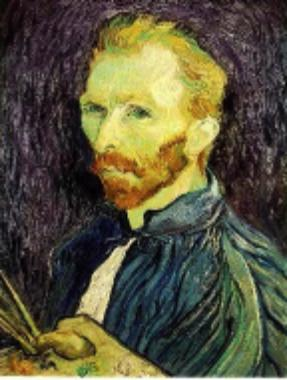

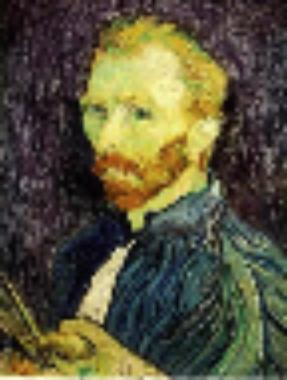

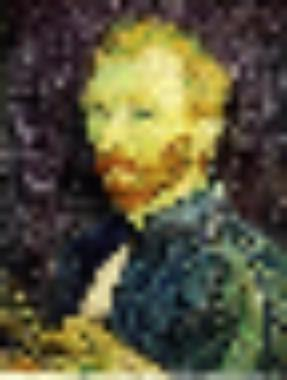

In [812]:
## From L2
def resize(image,size):
    return cv2.resize(image, size) 
img = imread("imgs/L634.png")
imshow(resize(img[::2,::2],(img.shape[1],img.shape[0])))
imshow(resize(img[::4,::4],(img.shape[1],img.shape[0])))
imshow(resize(img[::8,::8],(img.shape[1],img.shape[0])))

Filter and then subsampling

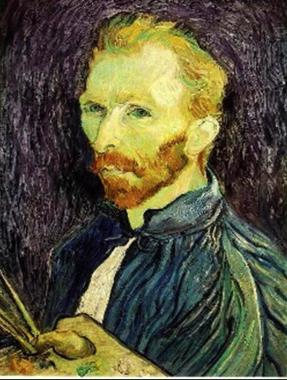

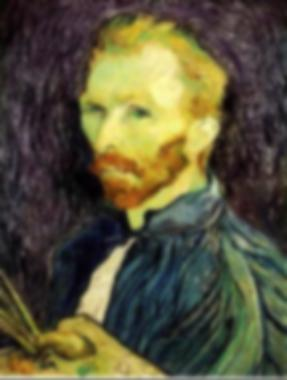

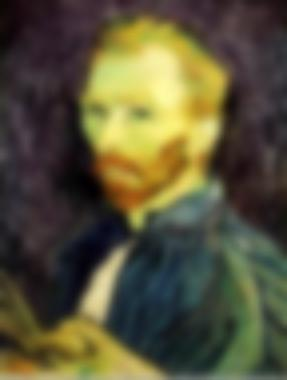

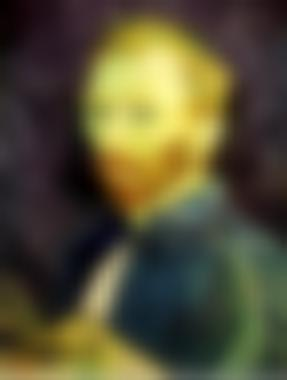

In [822]:
from skimage.filters import gaussian as gaussian_filter
imshow(img)
gimg = img.copy()
for i in range(3):
    gimg = normalize_img(gaussian_filter(gimg, sigma=2,multichannel=True)).astype(np.uint8)
    gimg = gimg[::2,::2]
    imshow(resize(gimg,(img.shape[1],img.shape[0])))

## Image Pyramids

<br/>
<figure>
    <img src="imgs/L635.png" width="400px" />
    <center><figcaption>Fig.17(a)</figcaption></center>
</figure>

Known as a **Gaussian Pyramid** [Burt and Adelson, 1983]

### "Band-pass" filtering

<br/>
<figure>
    <img src="imgs/L636.png" width="400px" />
    <center><figcaption>Fig.17(b): Gaussian Pyramid (low-pass image)</figcaption></center>
</figure>

<br/>
<figure>
    <img src="imgs/L637.png" width="400px" />
    <img src="imgs/L638.png" width="100px" />
    <center><figcaption>Fig.17(c): How can we reconstruct (collapse) this pyramid into the original image?
</figcaption></center>
</figure>

 



## Computing the Laplacian Pyramid

<br/>
<figure>
    <img src="imgs/L639.png" width="400px" />
    <center><figcaption>Fig.18</figcaption></center>
</figure>

## Reduce and Expand

<br/>
<figure>
    <img src="imgs/L640.png" width="400px" />
    <center><figcaption>Fig.19(a): Apply "5-tap"(1 4 6 4 1)/16 *separable* filter to make reduced image</figcaption></center>
</figure>

<br/>
<figure>
    <img src="imgs/L641.png" width="400px" />
    <center><figcaption>Fig.19(b): Apply different "3-tap" separable filters for event and odd pixels to make expanded image</figcaption></center>
</figure>

## Apples and Oranges

<br/>
<figure>
    <img src="imgs/L642.png" width="400px" />
    <center><figcaption>Fig.20(a)</figcaption></center>
</figure>


<br/>
<figure>
    <img src="imgs/L643.png" width="400px" />
    <center><figcaption>Fig.20(b)</figcaption></center>
</figure>



## Hierarchical LK

<br/>
<figure>
    <img src="imgs/L644.png" width="400px" />
    <center><figcaption>Fig.21(a)</figcaption></center>
</figure>

### Hierarchical LK

1. Compute Iterative LK at level K
2. Initialize $u_{K+1}, v_{K+1} = 0$ at size of level $K+1$
3. For each level $i$ from $K$ to 0
    - Upsample (EXPAND) $u_{i+1},v_{i+1}$ to create $u_i^p,v_i^p$ flow fields of now twice resolution as level $i+1$
    - Multiply $u_i^p,v_i^p$ by 2 to get predicted flow
    - Warp level $i$ Gaussian version of $I_2$ according to predicted flow to creae I_2'
    - Apply LK between $I_2'$ and level $i$ Gaussian version of $I_1$ to get $u_i^\delta, v_i^\delta$ (the correction in flow)<br />
    Add corrections to obtain the flow $u_i,v_i$ at $i^{th}$ level, i.e.,
    
    $$u_i = u_i^p + u_i^\delta$$
    $$v_i = v_i^p + v_i^\delta$$

### Optical Flow Results

<br />
<figure>
    <img src="imgs/L632.png" width="400px" />
    <img src="imgs/L633.png" width="400px" />
    <center><figcaption>Fig.21(b)</figcaption></center>
</figure>



## Sparse LK

- The Lucas-Kanade algorithm described gives a dense field, $(u,v)$ everywhere
- But we said that we only want to solve LK where the eigenvalues are well behaved
- "Sparse LK" is basically just that: hierarchical applied to good feature locations
- OpenCV LK used to be dense - then became sparse

## Start with Something Similar to Lucas Kanade

- gradient constancy
- energy minimization with smoothing term
- region matching
- keypoint matching (long-range)

<figure>
    <img src="imgs/L645.png" width="400px" />
    <center><figcaption>Fig.22</figcaption></center>
</figure>

In [2]:
# """
# Run the following code in the terminal so you can exit gracefully. 
# Source: https://pysource.com/2018/05/14/optical-flow-with-lucas-kanade-method-opencv-3-4-with-python-3-tutorial-31/

# The tutorial shows how to use Lucas-Kanade method implemeted on opencv to follow the movement of a pencil head. 
# """
 
# import cv2
# import numpy as np
 
# cap = cv2.VideoCapture(0)
 
# # Create old frame
# _, frame = cap.read()
# old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
# # Lucas kanade params
# lk_params = dict(winSize = (15, 15),
#                  maxLevel = 4,
#                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
 
# # Mouse function
# def select_point(event, x, y, flags, params):
#     global point, point_selected, old_points
#     if event == cv2.EVENT_LBUTTONDOWN:
#         point = (x, y)
#         point_selected = True
#         old_points = np.array([[x, y]], dtype=np.float32)
        
# cv2.namedWindow("Frame")
# cv2.setMouseCallback("Frame", select_point)
 
# point_selected = False
# point = ()
# old_points = np.array([[]])
# while True:
#     _, frame = cap.read()
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
#     if point_selected is True:
#         cv2.circle(frame, point, 5, (0, 0, 255), 2)
 
#         new_points, status, error = cv2.calcOpticalFlowPyrLK(old_gray, gray_frame, old_points, None, **lk_params)
#         old_gray = gray_frame.copy()
#         old_points = new_points
 
#         x, y = new_points.ravel()
#         cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)
 
 
 
#     cv2.imshow("Frame", frame)
 
#     key = cv2.waitKey(1)
#     if key == 27:
#         break

# cap.release()
# cv2.destroyAllWindows()

<figure>
    <img src="imgs/LucasKanadeMessi.gif" width="800px" />
</figure>

# <font color="red">🐐 Charming...Thank you Lucas and Kanade. I am flying to Lyon to watch the GOAT. Hope to see him at his best 🐐</font>
<img src="imgs/messi.png" align="middle" width=200px/>